In [1]:
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import save_model, load_model

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
import pickle

In [6]:
df = pd.read_csv('insurance.csv')

In [7]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

# Data Visualization

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


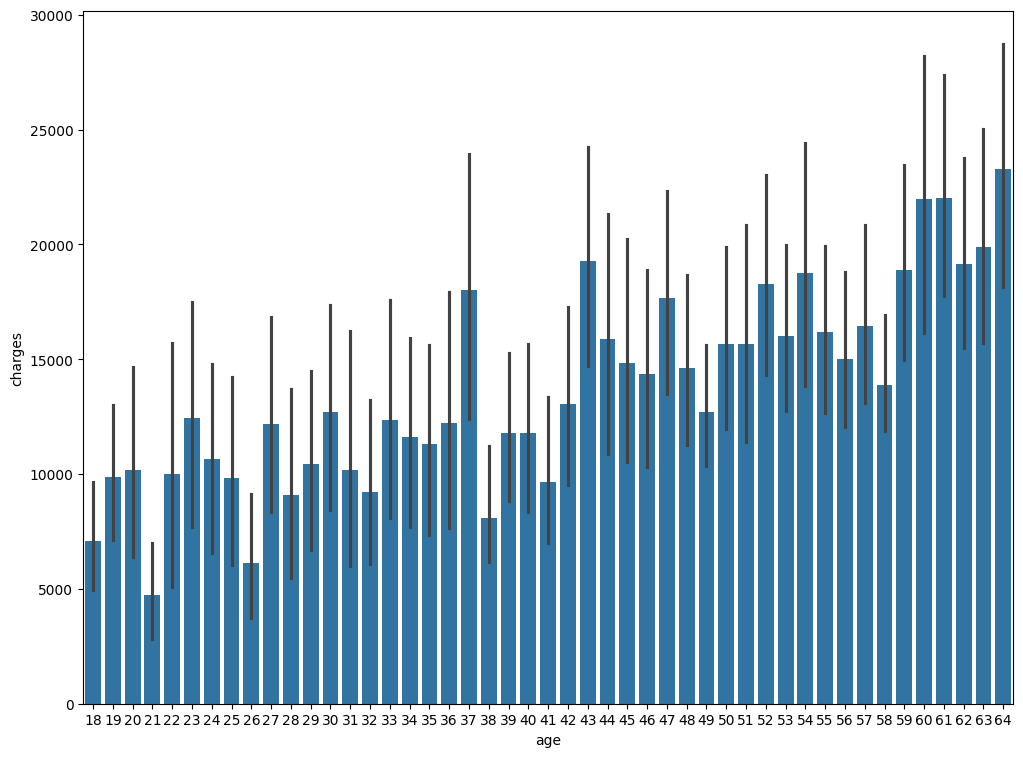

In [16]:
plt.figure(figsize=(12,9))
sns.barplot(x='age', y='charges', data=df)
plt.show()

<Axes: xlabel='bmi', ylabel='charges'>

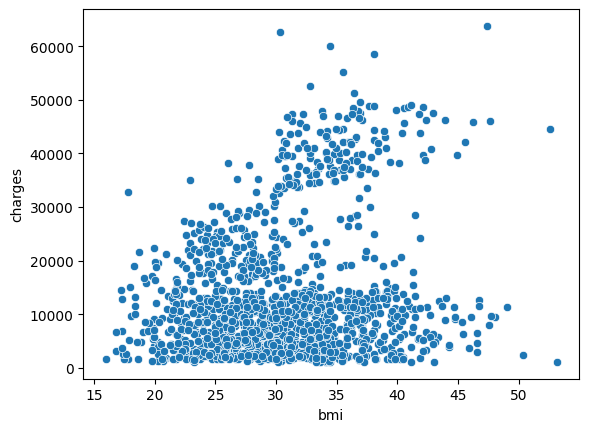

In [17]:
sns.scatterplot(x='bmi', y='charges', data=df)

<Axes: xlabel='children', ylabel='charges'>

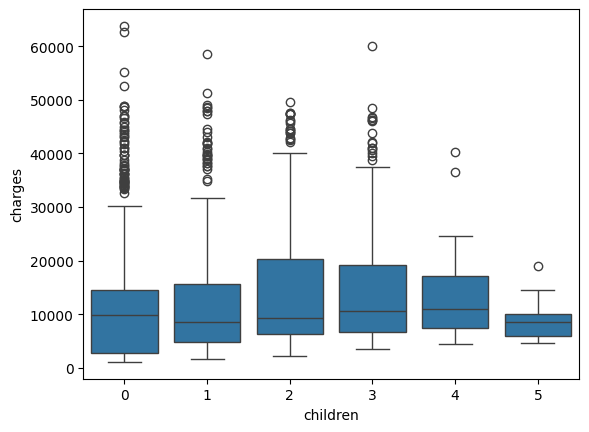

In [18]:
sns.boxplot(x='children', y='charges', data=df)

<Axes: xlabel='smoker', ylabel='charges'>

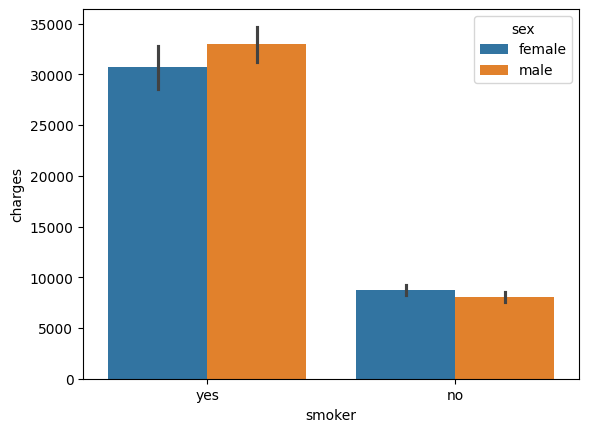

In [19]:
sns.barplot(x='smoker', y='charges', data=df, hue='sex')

In [20]:
df.shape

(1337, 7)

# Encoding

In [21]:
ohe_sex = OneHotEncoder(drop='first', handle_unknown='ignore')
ohe_smoke = OneHotEncoder(drop='first', handle_unknown='ignore')

In [22]:
le = LabelEncoder()

In [23]:
encoded_sex = ohe_sex.fit_transform(df[['sex']]).toarray()
encoded_smoker = ohe_smoke.fit_transform(df[['smoker']]).toarray()
encoded_region = le.fit_transform(df['region'])

In [24]:
df['sex'] = encoded_sex
df['smoker'] = encoded_smoker
df['region'] = encoded_region

In [25]:
pickle.dump(le, open('label.pkl', 'wb'))
pickle.dump(ohe_sex, open('ohe_sex.pkl', 'wb'))
pickle.dump(ohe_smoke, open('ohe_smoker.pkl', 'wb'))

In [26]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3,16884.92400
1,18,1.0,33.770,1,0.0,2,1725.55230
2,28,1.0,33.000,3,0.0,2,4449.46200
3,33,1.0,22.705,0,0.0,1,21984.47061
4,32,1.0,28.880,0,0.0,1,3866.85520
5,31,0.0,25.740,0,0.0,2,3756.62160
6,46,0.0,33.440,1,0.0,2,8240.58960
7,37,0.0,27.740,3,0.0,1,7281.50560
8,37,1.0,29.830,2,0.0,0,6406.41070
9,60,0.0,25.840,0,0.0,1,28923.13692


In [27]:
df['sex'] = df['sex'].astype('int')
df['smoker'] = df['smoker'].astype('int')

# Train Test Split

In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
X_train.shape

(1069, 6)

In [31]:
X_test.shape

(268, 6)

In [32]:
X_train.head()

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,0
968,21,1,25.745,2,0,0
599,52,0,37.525,2,0,1
170,63,1,41.470,0,0,2
275,47,0,26.600,2,0,0


In [33]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

In [34]:
X_train_scaler = scaler_x.fit_transform(X_train)
y_train_scaler = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

In [35]:
X_test_scaler = scaler_x.fit_transform(X_test)
y_test_scaler = scaler_y.fit_transform(y_test.values.reshape(-1, 1))

In [36]:
pickle.dump(scaler_x, open('scaler_x.pkl', 'wb')) 
pickle.dump(scaler_y, open('scaler_y.pkl', 'wb')) 

In [37]:
X_train_scaler[0]

array([-1.1576804 ,  0.97140947, -0.99692768, -0.90790804, -0.50029231,
       -1.38394601])

In [38]:
y_train_scaler

array([[-0.90881619],
       [-0.83328687],
       [ 1.74700229],
       ...,
       [-0.94567747],
       [-0.50244288],
       [-0.6147893 ]])

# Creating Tensorflow Model

In [39]:
model = Sequential()

In [40]:
model.add(Dense(256, activation='relu', input_shape=[X_train_scaler.shape[1]]))
# model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())

model.add(Dense(16, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
# model.add(BatchNormalization())

model.add(Dense(1, activation='linear'))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1792      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 32)                2

In [42]:
adam = Adam(learning_rate=0.00001)

In [43]:
model.compile(optimizer=adam, loss='mse', metrics=['mae'])

In [44]:
history = model.fit(X_train_scaler, y_train_scaler, epochs=250, validation_data=(X_test_scaler, y_test_scaler))

Epoch 1/250
34/34 [==============================] - 2s 21ms/step - loss: 0.9957 - mae: 0.7487 - val_loss: 0.9939 - val_mae: 0.7594
Epoch 2/250
34/34 [==============================] - 0s 12ms/step - loss: 0.9909 - mae: 0.7467 - val_loss: 0.9890 - val_mae: 0.7569
Epoch 3/250
34/34 [==============================] - 1s 15ms/step - loss: 0.9851 - mae: 0.7437 - val_loss: 0.9819 - val_mae: 0.7530
Epoch 4/250
34/34 [==============================] - 0s 13ms/step - loss: 0.9781 - mae: 0.7399 - val_loss: 0.9734 - val_mae: 0.7486
Epoch 5/250
34/34 [==============================] - 0s 13ms/step - loss: 0.9700 - mae: 0.7355 - val_loss: 0.9638 - val_mae: 0.7433
Epoch 6/250
34/34 [==============================] - 0s 13ms/step - loss: 0.9606 - mae: 0.7306 - val_loss: 0.9527 - val_mae: 0.7374
Epoch 7/250
34/34 [==============================] - 0s 14ms/step - loss: 0.9495 - mae: 0.7249 - val_loss: 0.9393 - val_mae: 0.7305
Epoch 8/250
34/34 [==============================] - 0s 11ms/step - loss: 0.

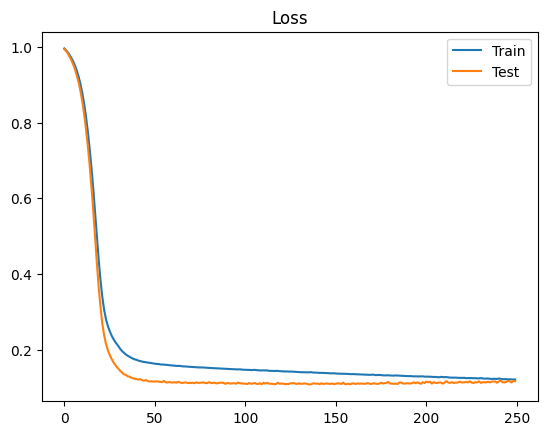

In [45]:
plt.title("Loss")
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()

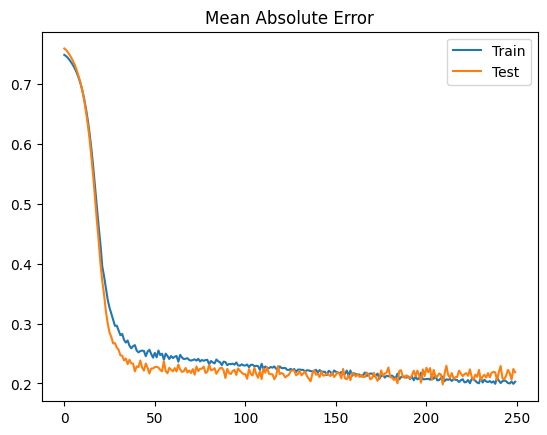

In [46]:
plt.title("Mean Absolute Error")
plt.plot(history.history['mae'], label='Train')
plt.plot(history.history['val_mae'], label='Test')
plt.legend()
plt.show()

In [47]:
save_model(model, 'model.h5')

# Demo

In [54]:
import numpy as np
import pickle
import pandas as pd
from tensorflow.keras.models import load_model

model = load_model('model.h5')
scaler_X = pickle.load(open('scaler_X.pkl', 'rb'))
scaler_y = pickle.load(open('scaler_y.pkl', 'rb'))
ohe_sex = pickle.load(open('ohe_sex.pkl', 'rb'))
ohe_smoke = pickle.load(open('ohe_smoker.pkl', 'rb'))
le = pickle.load(open('label.pkl', 'rb'))

def predict_insurance(age, sex, bmi, children, smoker, region):
    if region not in le.classes_:
        raise ValueError(f"Unknown region '{region}'. Valid options: {list(le.classes_)}")

    sex_encoded = ohe_sex.transform(pd.DataFrame([[sex]], columns=['sex'])).toarray().flatten()
    smoker_encoded = ohe_smoke.transform(pd.DataFrame([[smoker]], columns=['smoker'])).toarray().flatten()
    region_encoded = le.transform([region])

    input_data = np.hstack(([age, bmi, children], sex_encoded, smoker_encoded, region_encoded))

    input_scaled = scaler_X.transform([input_data])

    prediction_scaled = model.predict(input_scaled)
    prediction = scaler_y.inverse_transform(prediction_scaled.reshape(-1, 1))[0][0]

    return round(abs(prediction), 2)

try:
    predicted_cost = predict_insurance(50, 'male', 30.970, 3, 'no', 'northwest')
    print(f"Predicted Insurance Cost: ${predicted_cost}")
except ValueError as e:
    print(f"Error: {e}")


C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 159ms/step
Predicted Insurance Cost: $49097.12109375
